In [ ]:
# Project name

In [1]:
print("Project name: Predicting grocery sales")

Project name: Predicting grocery sales


In [ ]:
# A brief about problem statement

In [ ]:
'''
Given the daily sales of a grocery shop recorded over a period of almost 2 years, your objective as a data scientist is to build
a machine learning model that can forecast the sales for the upcoming 3 months.

You are provided with the recorded observation of daily sales of a grocery shop over a period of 692 days to forecast the sales
of the next 90 days.

The leaderboard is evaluated using RMSE Score for the participant’s submission.
'''

In [ ]:
# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [ ]:
# Loading dataset

In [2]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [ ]:
# shaepe of dataset

In [4]:
print("shape of training dataset:",train.shape)
print("shape of testing dataset:",test.shape)

shape of training dataset: (692, 2)
shape of testing dataset: (90, 1)


In [ ]:
# A look at the training dataset

In [6]:
train.head(5)

,Day,GrocerySales
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


In [ ]:
# A few rows from last

In [7]:
train.tail(5)

,Day,GrocerySales
687,688,8848.98
688,689,8800.45
689,690,9197.99
690,691,9062.44
691,692,8963.12


In [ ]:
# Lets check test dataset

In [8]:
test.head(5)

,Day
0,693
1,694
2,695
3,696
4,697


In [ ]:
# A few rows from bottom

In [9]:
test.tail(5)

,Day
85,778
86,779
87,780
88,781
89,782


In [ ]:
# A brief summary of dataset

In [10]:
pd.DataFrame({"TotalMissing":train.isna().sum(),"%Missing":train.isna().mean(),"DataType":train.dtypes,"Unique":train.nunique()})

,TotalMissing,%Missing,DataType,Unique
Day,0,0.0,int64,692
GrocerySales,0,0.0,float64,690


In [11]:
pd.DataFrame({"TotalMissing":test.isna().sum(),"%Missing":test.isna().mean(),"DataType":test.dtypes,"Unique":test.nunique()})

,TotalMissing,%Missing,DataType,Unique
Day,0,0.0,int64,90


In [ ]:
# Basic stats value of training dataset

In [12]:
train.describe()

,Day,GrocerySales
count,692.000000,692.000000
mean,346.500000,8564.733471
std,199.907479,428.815668
min,1.000000,6766.370000
25%,173.750000,8411.536858
50%,346.500000,8677.770000
75%,519.250000,8852.387500
max,692.000000,9290.020000


In [ ]:
# EDA

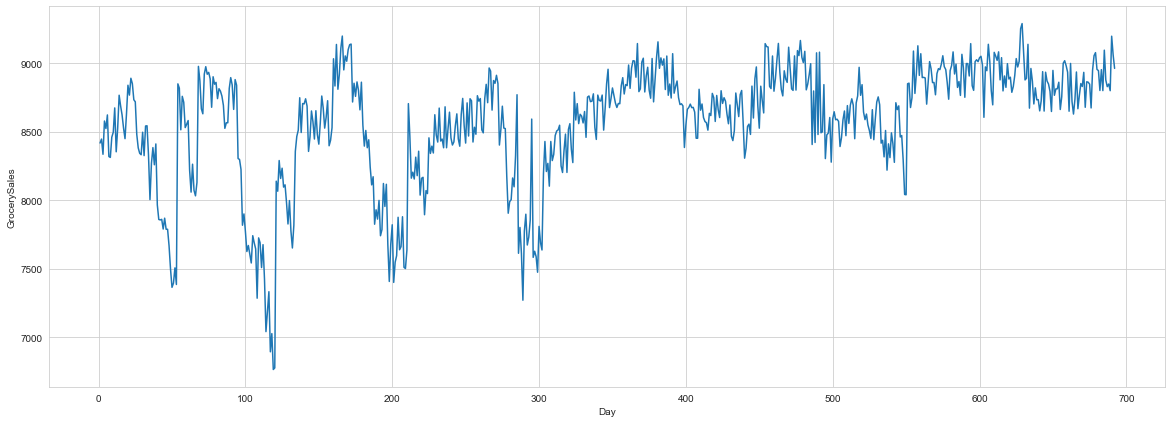

In [15]:
plt.figure(figsize=(20,7))
sns.lineplot(x=train["Day"],y=train["GrocerySales"])
plt.savefig("G-sales.png")

In [11]:
df.set_index('Date',inplace=True)

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
del df["Day"]

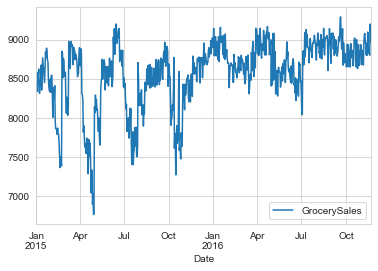

In [78]:
df.plot()

In [90]:
from statsmodels.tsa.arima_model import ARIMA

In [94]:
model=ARIMA(df['GrocerySales'],order=(4,1,1))
model_fit=model.fit()

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


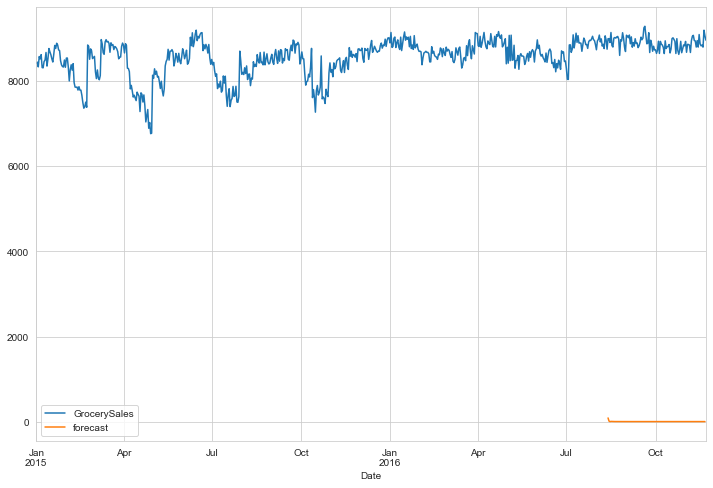

In [96]:
df['forecast']=model_fit.predict(start=590,end=690,dynamic=True)
df[['GrocerySales','forecast']].plot(figsize=(12,8))

In [ ]:
# Creating a list of to take all date

In [3]:
list1=pd.date_range(start="2015-01-01",periods=692).tolist()

In [ ]:
# converting list to dataframe

In [4]:
df1=pd.DataFrame(list1)

In [ ]:
# Concating with test dataset

In [5]:
df=pd.concat([train,df1],axis=1)

In [ ]:
# Renaming columns

In [6]:
df.rename(columns={0:"Date"},inplace=True)

In [ ]:
# Lets check the dataset

In [7]:
df.head(4)

,Day,GrocerySales,Date
0,1,8418.59,2015-01-01
1,2,8447.47,2015-01-02
2,3,8336.49,2015-01-03
3,4,8579.17,2015-01-04


In [8]:
# Let's create some additional datetime based features
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['dayofweek'] = df.Date.dt.dayofweek
df['day'] = df.Date.dt.day
df['quarter'] = df.Date.dt.quarter
df['is_month_start'] = df.Date.dt.is_month_start
df['is_month_end'] = df.Date.dt.is_month_end
df['is_quarter_start'] = df.Date.dt.is_quarter_start
df['is_quarter_end'] = df.Date.dt.is_quarter_end

In [ ]:
# Lets check the dataset

In [9]:
df.tail(5)

,Day,GrocerySales,Date,year,month,dayofweek,day,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end
687,688,8848.98,2016-11-18,2016,11,4,18,4,False,False,False,False
688,689,8800.45,2016-11-19,2016,11,5,19,4,False,False,False,False
689,690,9197.99,2016-11-20,2016,11,6,20,4,False,False,False,False
690,691,9062.44,2016-11-21,2016,11,0,21,4,False,False,False,False
691,692,8963.12,2016-11-22,2016,11,1,22,4,False,False,False,False


In [ ]:
# test dataset

In [ ]:
# Creating a list of to take all date

In [10]:
list1=pd.date_range(start="2016-11-22",periods=90).tolist()

In [ ]:
# converting list to dataframe

In [11]:
df2=pd.DataFrame(list1)

In [ ]:
# Concating with test dataset

In [12]:
test=pd.concat([test,df2],axis=1)

In [ ]:
# Renaming columns

In [13]:
test.rename(columns={0:"Date"},inplace=True)

In [ ]:
# Let's create some additional datetime based features

In [14]:
test['year'] = test.Date.dt.year
test['month'] = test.Date.dt.month
test['dayofweek'] = test.Date.dt.dayofweek
test['day'] = test.Date.dt.day
test['quarter'] = test.Date.dt.quarter
test['is_month_start'] = test.Date.dt.is_month_start
test['is_month_end'] = test.Date.dt.is_month_end
test['is_quarter_start'] = test.Date.dt.is_quarter_start
test['is_quarter_end'] = test.Date.dt.is_quarter_end

In [ ]:
# Lets see the processed test dataset

In [15]:
test.head(5)

,Day,Date,year,month,dayofweek,day,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end
0,693,2016-11-22,2016,11,1,22,4,False,False,False,False
1,694,2016-11-23,2016,11,2,23,4,False,False,False,False
2,695,2016-11-24,2016,11,3,24,4,False,False,False,False
3,696,2016-11-25,2016,11,4,25,4,False,False,False,False
4,697,2016-11-26,2016,11,5,26,4,False,False,False,False


In [ ]:
# Data Visualization

In [47]:
df.groupby('month')['GrocerySales'].agg(['min','max','mean','median','std'])

,min,max,mean,median,std
month,,,,,
1,8313.530000,9156.73,8724.770645,8758.315000,236.903298
2,7365.830000,8850.22,8365.320490,8546.275000,435.204655
3,8033.410000,9143.65,8663.592581,8695.230000,246.386410
4,6766.370000,9166.56,8331.490667,8803.635000,750.950472
5,7652.930000,9081.48,8460.686521,8492.413717,288.993387
6,8220.670000,9198.97,8691.810158,8681.538717,245.178856
7,7401.900000,9127.92,8365.562055,8456.695000,551.295800
8,7895.520000,9143.67,8643.640033,8678.195000,339.146472
9,8395.267433,9290.02,8803.293102,8827.875000,214.608433


In [49]:
df.groupby('month')['GrocerySales'].agg(['count','min','max','mean','median','std','sum']).sort_values(by='sum')

,count,min,max,mean,median,std,sum
month,,,,,,,
12,31,8444.970000,9019.19,8773.724839,8768.410000,136.727339,271985.470000
11,53,8103.980000,9197.99,8658.600943,8674.470000,274.490402,458905.850000
2,56,7365.830000,8850.22,8365.320490,8546.275000,435.204655,468457.947433
4,60,6766.370000,9166.56,8331.490667,8803.635000,750.950472,499889.440000
7,62,7401.900000,9127.92,8365.562055,8456.695000,551.295800,518664.847433
10,62,7271.800000,9019.22,8397.403949,8649.620000,507.524487,520639.044866
6,60,8220.670000,9198.97,8691.810158,8681.538717,245.178856,521508.609464
5,62,7652.930000,9081.48,8460.686521,8492.413717,288.993387,524562.564330
9,60,8395.267433,9290.02,8803.293102,8827.875000,214.608433,528197.586093


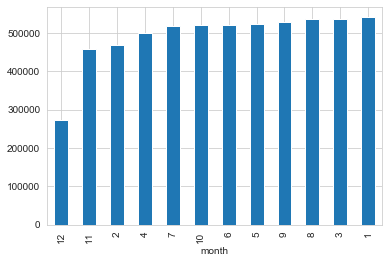

In [13]:
df.groupby('month')['GrocerySales'].sum().sort_values().plot(kind='bar')
plt.savefig("month-sales.png")

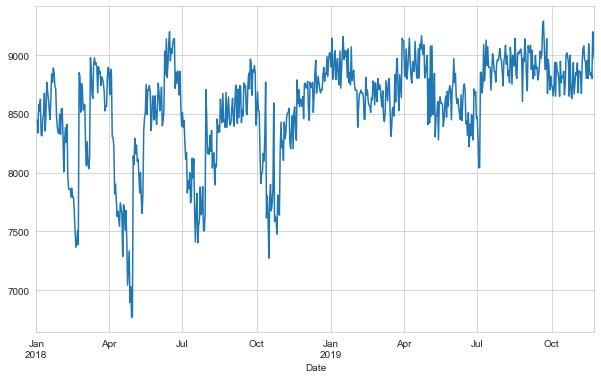

In [14]:
df.set_index('Date').resample('D')['GrocerySales'].sum().plot(kind='line',figsize=(10,6))
plt.savefig("Daysales.png")

In [ ]:
# Week

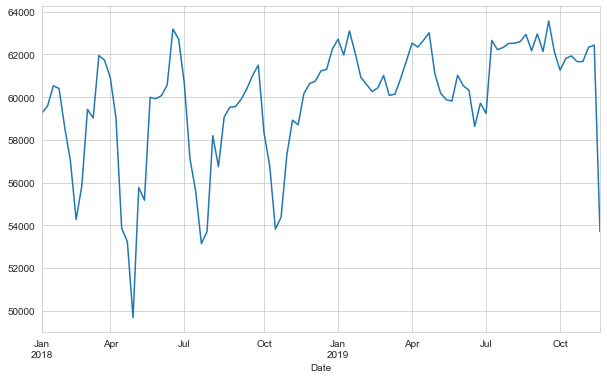

In [15]:
df.set_index('Date').resample('W')['GrocerySales'].sum().plot(kind='line',figsize=(10,6))
plt.savefig("weeksales.png")

In [ ]:
# Month

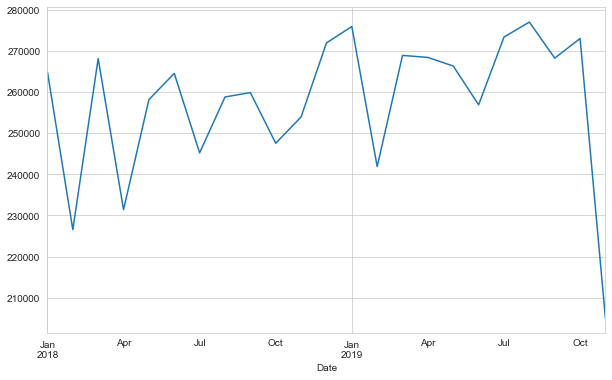

In [16]:
df.set_index('Date').resample('M')['GrocerySales'].sum().plot(kind='line',figsize=(10,6))
plt.savefig("monthsales.png")

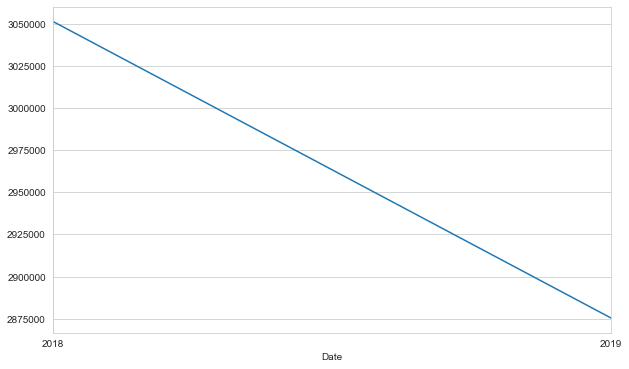

In [17]:
df.set_index('Date').resample('Y')['GrocerySales'].sum().plot(kind='line',figsize=(10,6))
plt.savefig("yearsales.png")

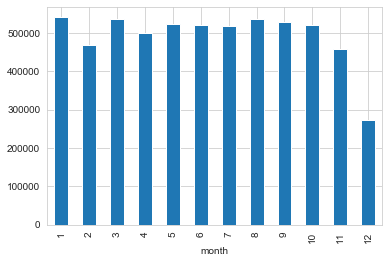

In [59]:
df.groupby('month')['GrocerySales'].sum().sort_index().plot(kind='bar')

In [60]:
df.groupby('dayofweek')['GrocerySales'].agg(['count','min','max','sum','mean']).sort_values(by='count')

,count,min,max,sum,mean
dayofweek,,,,,
6,98,6766.37,9122.25,836690.649464,8537.659688
0,99,6777.93,9145.24,849238.336897,8578.165019
1,99,7042.67,9166.56,847455.822031,8560.159818
2,99,7186.41,9156.73,845073.539464,8536.096358
3,99,7333.94,9197.99,849093.524598,8576.702269
4,99,6895.51,9253.00,848669.679464,8572.421005
5,99,7028.23,9290.02,850574.009732,8591.656664


In [62]:
df.groupby(['year','quarter'])['GrocerySales'].agg(['count','min','max','sum','mean'])

count      min      max            sum         mean
year quarter                                                     
2018 1           90  7365.83  8977.75  759672.650000  8440.807222
     2           91  6766.37  9198.97  754199.466629  8287.906227
     3           92  7401.90  8966.02  763986.858124  8304.204980
     4           92  7271.80  9019.19  773551.044866  8408.163531
2019 1           90  8308.05  9156.73  786863.817433  8742.931305
     2           91  8220.67  9166.56  791761.147165  8700.671947
     3           92  8041.11  9290.02  818781.257433  8899.796276
     4           54  8629.93  9197.99  477979.320000  8851.468889

In [ ]:
# Encoding categorical cols

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
df["is_month_start"]=le.fit_transform(df["is_month_start"])
df["is_month_end"]=le.fit_transform(df["is_month_end"])
df["is_quarter_start"]=le.fit_transform(df["is_quarter_start"])
df["is_quarter_end"]=le.fit_transform(df["is_quarter_end"])

In [ ]:
# Applying same preprocessing technique on test dataset

In [19]:
test["is_month_start"]=le.fit_transform(test["is_month_start"])
test["is_month_end"]=le.fit_transform(test["is_month_end"])
test["is_quarter_start"]=le.fit_transform(test["is_quarter_start"])
test["is_quarter_end"]=le.fit_transform(test["is_quarter_end"])

In [ ]:
# Dropping unnecessary cols

In [20]:
del df["Date"]
del test["Date"]

In [181]:
del df["is_month_start"]
del df["is_quarter_start"]
del test["is_month_start"]
del test["is_quarter_start"]

In [ ]:
# Lets divide dataset into dependent and independent variables

In [21]:
y=df["GrocerySales"]
x=df.drop(["GrocerySales"],axis=1)

In [ ]:
# Feature importance

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.26316487 0.22930463 0.23208581 0.04177546 0.13660345 0.08620385
 0.0016068  0.00592499 0.00055826 0.00277188]


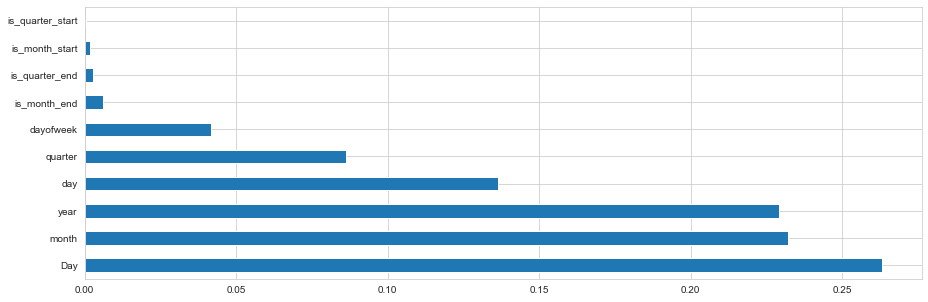

<Figure size 432x288 with 0 Axes>

In [29]:
fig=plt.figure(figsize=(15,5))
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()
plt.savefig("featimp.png")

In [ ]:
# Importing required libraries

In [37]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold,GridSearchCV

In [ ]:
# splitting the dataset using train test split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
# Printing the shape of splitted dataset

In [25]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (484, 10)
shape of y_train: (484,)
shape of x_test: (208, 10)
shape of y_test: (208,)


In [ ]:
# Applying ML algo

In [34]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pred=ridge.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

4.253076659964492


In [33]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

2.766025749919967


In [40]:
br=BaggingRegressor()
br.fit(x_train,y_train)
pred=br.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

2.932577649405642


In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

4.883320135505683


In [42]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

3.0228892837525247


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
RFR = RandomForestRegressor()

# Choose some parameter combinations to try
parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }


#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(RFR, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
RFR = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
RFR.fit(x_train, y_train)
y_pred = RFR.predict(x_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')
rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(rmsle*100)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   14.0s finished


R2 score =  0.7231569977938798 / 1.0
MSE score =  44466.42683377578 / 0.0
2.543822054236349


In [43]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred=etr.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

2.7899116958247125


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
etr = ExtraTreesRegressor()

# Choose some parameter combinations to try

parameters = {'n_estimators': [5,10,100],
              'criterion': ['mse'],
              'max_depth': [5,10,15], 
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5]
             }
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold

grid_obj = GridSearchCV(etr, parameters,
                        cv=3, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
etr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
etr.fit(x_train, y_train)

y_pred = RFR.predict(x_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')
rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(rmsle*100)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s


R2 score =  0.7231569977938798 / 1.0
MSE score =  44466.42683377578 / 0.0
2.543822054236349


[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    3.7s finished


In [44]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

4.378827658391303


In [45]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

3.188794005276934


In [46]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred=abr.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

3.7964617923420074


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
#gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.3,n_estimators=100,max_depth=5,min_samples_split=3)
gbr=GradientBoostingRegressor()

parameters = {'n_estimators': [5,10],
              'loss':['huber'],
              'criterion': ['mse'],
              'max_depth': [5,10], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gbr.fit(x_train, y_train)

y_pred = RFR.predict(x_test)

print('R2 score = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score = ',mean_squared_error(y_test, y_pred), '/ 0.0')
rmsle=np.sqrt(mean_squared_log_error(y_test,y_pred))
print(rmsle*100)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.0s finished


R2 score =  0.7231569977938798 / 1.0
MSE score =  44466.42683377578 / 0.0
2.543822054236349


In [47]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(max_depth=15)
lgbm.fit(x_train,y_train)
pred=lgbm.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

2.6793138083507344


In [ ]:
# Applying best model on test dataset:488.96,21

In [69]:
rf=RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,max_features = "auto", min_samples_leaf = 1)
rf.fit(x,y)
pred=rf.predict(test)

In [ ]:
# Converting predicted values in dataframe

In [70]:
submission=pd.DataFrame({"GrocerySales":pred})

In [ ]:
# Lets prepare our dataframe as asked for submission and exporting result in csv

In [71]:
submission.to_csv("Gsales2.csv",index=False)

In [48]:
from catboost import CatBoostRegressor
import catboost as cb

In [49]:
cat_rg1 = cb.CatBoostRegressor(loss_function='RMSE')
cat_rg1.fit(x_train,y_train)
pred=cat_rg1.predict(x_test)
rmsle=np.sqrt(mean_squared_log_error(y_test,pred))
print(rmsle*100)

Learning rate set to 0.034301
0:	learn: 434.2834991	total: 111ms	remaining: 1m 50s
1:	learn: 429.8165483	total: 113ms	remaining: 56.5s
2:	learn: 422.7900516	total: 116ms	remaining: 38.5s
3:	learn: 415.5742535	total: 118ms	remaining: 29.5s
4:	learn: 410.8202199	total: 121ms	remaining: 24.1s
5:	learn: 403.9719734	total: 124ms	remaining: 20.5s
6:	learn: 398.3961818	total: 126ms	remaining: 17.9s
7:	learn: 395.1147669	total: 127ms	remaining: 15.8s
8:	learn: 390.4258125	total: 130ms	remaining: 14.3s
9:	learn: 385.2364358	total: 133ms	remaining: 13.1s
10:	learn: 380.7957166	total: 135ms	remaining: 12.1s
11:	learn: 375.1632494	total: 138ms	remaining: 11.3s
12:	learn: 370.9685744	total: 140ms	remaining: 10.6s
13:	learn: 365.1823256	total: 143ms	remaining: 10.1s
14:	learn: 362.6064748	total: 145ms	remaining: 9.55s
15:	learn: 357.5958769	total: 148ms	remaining: 9.11s
16:	learn: 353.0741358	total: 151ms	remaining: 8.71s
17:	learn: 347.8967350	total: 153ms	remaining: 8.35s
18:	learn: 344.6834356	to

208:	learn: 160.6439842	total: 659ms	remaining: 2.5s
209:	learn: 160.2320246	total: 662ms	remaining: 2.49s
210:	learn: 159.8568026	total: 666ms	remaining: 2.49s
211:	learn: 159.4327919	total: 668ms	remaining: 2.48s
212:	learn: 158.9691145	total: 671ms	remaining: 2.48s
213:	learn: 158.5846708	total: 673ms	remaining: 2.47s
214:	learn: 158.1629015	total: 675ms	remaining: 2.46s
215:	learn: 157.9759183	total: 677ms	remaining: 2.46s
216:	learn: 157.5712469	total: 679ms	remaining: 2.45s
217:	learn: 157.1921131	total: 681ms	remaining: 2.44s
218:	learn: 156.9185489	total: 683ms	remaining: 2.44s
219:	learn: 156.5439598	total: 685ms	remaining: 2.43s
220:	learn: 156.0722105	total: 688ms	remaining: 2.42s
221:	learn: 155.6421181	total: 690ms	remaining: 2.42s
222:	learn: 155.2831807	total: 693ms	remaining: 2.41s
223:	learn: 154.9624114	total: 695ms	remaining: 2.41s
224:	learn: 154.5218114	total: 698ms	remaining: 2.4s
225:	learn: 154.1393771	total: 701ms	remaining: 2.4s
226:	learn: 153.8180678	total: 

386:	learn: 118.0493489	total: 1.12s	remaining: 1.77s
387:	learn: 117.9798844	total: 1.12s	remaining: 1.77s
388:	learn: 117.9327821	total: 1.12s	remaining: 1.77s
389:	learn: 117.7352141	total: 1.13s	remaining: 1.76s
390:	learn: 117.6678217	total: 1.13s	remaining: 1.76s
391:	learn: 117.6046242	total: 1.13s	remaining: 1.75s
392:	learn: 117.5240381	total: 1.13s	remaining: 1.75s
393:	learn: 117.4017411	total: 1.14s	remaining: 1.75s
394:	learn: 117.2282044	total: 1.14s	remaining: 1.75s
395:	learn: 117.0730939	total: 1.14s	remaining: 1.74s
396:	learn: 116.9878501	total: 1.14s	remaining: 1.74s
397:	learn: 116.8866090	total: 1.15s	remaining: 1.73s
398:	learn: 116.8279564	total: 1.15s	remaining: 1.73s
399:	learn: 116.6565866	total: 1.15s	remaining: 1.72s
400:	learn: 116.5521381	total: 1.15s	remaining: 1.72s
401:	learn: 116.3364165	total: 1.15s	remaining: 1.72s
402:	learn: 116.2507973	total: 1.16s	remaining: 1.71s
403:	learn: 116.1378987	total: 1.16s	remaining: 1.71s
404:	learn: 115.9392539	tota

567:	learn: 98.3238288	total: 1.58s	remaining: 1.2s
568:	learn: 98.2896761	total: 1.58s	remaining: 1.2s
569:	learn: 98.1730260	total: 1.58s	remaining: 1.19s
570:	learn: 98.1650404	total: 1.58s	remaining: 1.19s
571:	learn: 98.1221817	total: 1.58s	remaining: 1.19s
572:	learn: 98.0060669	total: 1.59s	remaining: 1.18s
573:	learn: 97.8412970	total: 1.59s	remaining: 1.18s
574:	learn: 97.7233732	total: 1.59s	remaining: 1.18s
575:	learn: 97.6102497	total: 1.6s	remaining: 1.17s
576:	learn: 97.5486799	total: 1.6s	remaining: 1.17s
577:	learn: 97.4396496	total: 1.6s	remaining: 1.17s
578:	learn: 97.2919513	total: 1.6s	remaining: 1.17s
579:	learn: 97.2449499	total: 1.61s	remaining: 1.16s
580:	learn: 97.0801476	total: 1.61s	remaining: 1.16s
581:	learn: 96.9543646	total: 1.61s	remaining: 1.16s
582:	learn: 96.8355627	total: 1.61s	remaining: 1.15s
583:	learn: 96.6897978	total: 1.62s	remaining: 1.15s
584:	learn: 96.6074079	total: 1.62s	remaining: 1.15s
585:	learn: 96.5943391	total: 1.62s	remaining: 1.15s

740:	learn: 85.5651596	total: 2.02s	remaining: 707ms
741:	learn: 85.4705071	total: 2.03s	remaining: 705ms
742:	learn: 85.4127783	total: 2.03s	remaining: 702ms
743:	learn: 85.3283735	total: 2.03s	remaining: 699ms
744:	learn: 85.2831619	total: 2.03s	remaining: 696ms
745:	learn: 85.2075064	total: 2.04s	remaining: 694ms
746:	learn: 85.1652303	total: 2.04s	remaining: 691ms
747:	learn: 85.0647687	total: 2.04s	remaining: 688ms
748:	learn: 85.0050849	total: 2.04s	remaining: 685ms
749:	learn: 84.9326189	total: 2.05s	remaining: 683ms
750:	learn: 84.8387448	total: 2.05s	remaining: 680ms
751:	learn: 84.8038154	total: 2.05s	remaining: 678ms
752:	learn: 84.7478863	total: 2.06s	remaining: 675ms
753:	learn: 84.7092252	total: 2.06s	remaining: 672ms
754:	learn: 84.6379720	total: 2.06s	remaining: 669ms
755:	learn: 84.6130560	total: 2.06s	remaining: 666ms
756:	learn: 84.5871416	total: 2.07s	remaining: 664ms
757:	learn: 84.5432873	total: 2.07s	remaining: 661ms
758:	learn: 84.5066020	total: 2.07s	remaining:

927:	learn: 75.6833728	total: 2.49s	remaining: 193ms
928:	learn: 75.6412348	total: 2.49s	remaining: 190ms
929:	learn: 75.5463986	total: 2.49s	remaining: 188ms
930:	learn: 75.5218960	total: 2.5s	remaining: 185ms
931:	learn: 75.5091380	total: 2.5s	remaining: 182ms
932:	learn: 75.3719962	total: 2.5s	remaining: 180ms
933:	learn: 75.3431605	total: 2.5s	remaining: 177ms
934:	learn: 75.2526524	total: 2.51s	remaining: 174ms
935:	learn: 75.1987766	total: 2.51s	remaining: 172ms
936:	learn: 75.1726102	total: 2.51s	remaining: 169ms
937:	learn: 75.1173145	total: 2.51s	remaining: 166ms
938:	learn: 75.0839679	total: 2.52s	remaining: 164ms
939:	learn: 75.0602872	total: 2.52s	remaining: 161ms
940:	learn: 75.0311656	total: 2.52s	remaining: 158ms
941:	learn: 75.0052879	total: 2.52s	remaining: 155ms
942:	learn: 74.9672613	total: 2.53s	remaining: 153ms
943:	learn: 74.9498648	total: 2.53s	remaining: 150ms
944:	learn: 74.9437311	total: 2.53s	remaining: 147ms
945:	learn: 74.9128694	total: 2.53s	remaining: 145

In [35]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [38]:
scaler= StandardScaler()
scaled_data = scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_data)

In [37]:
scaler= StandardScaler()
scaled_data = scaler.fit_transform(x_test)
x_test = pd.DataFrame(scaled_data)